In [150]:
#Importing Libararies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [151]:
#Loading data
customer_data = pd.read_csv("Dataset/Churn_Modelling.csv")

In [152]:
#Display the first 5 rows of the Dataframe
customer_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*Credit score :* credit score is a numerical representation of a person's creditworthiness, or how likely they are to repay borrowed money. It is used by banks and financial institutions to assess the risk of lending to a borrower.

*tenure :* tenure refers to the length of time for which a loan, deposit, or financial product is held or agreed upon. It represents the duration of the agreement between the borrower and the lender or the investor and the bank.

Exited is the Target variable

In [153]:
#Getting list of columns
columns = customer_data.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [154]:
#Removing unnecessary columns (rown numbers, ID column, surname)
#axis=1 for columns
#axis =0 for rows
dataset = customer_data.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [155]:
dataset.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [156]:
#Checking for Missing Values
count = dataset.isnull().sum()
print(count)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


There are no missing value in the dataset

In [157]:
#Converting catergorical columns to numerical columns
# One-Hot Encoding is used for this purpose

#One-Hot Encoding Gender Column
encoded_columns = pd.get_dummies(dataset["Gender"],prefix="Gender")
dataset = pd.concat([dataset,encoded_columns],axis=1)
dataset.drop("Gender",axis=1,inplace=True)
dataset.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [158]:
#One-Hot Encoding Gender Column
encoded_columns = pd.get_dummies(dataset["Geography"],prefix="Geography")
dataset = pd.concat([dataset,encoded_columns],axis=1)
dataset.drop("Geography",axis=1,inplace=True)
dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [ ]:
# Drop one category for each categorical variable to avoid perfect multicollinearity
#If you have both Gender_Female and Gender_Male as features, they are perfectly correlated because knowing one gives you the value of the other. The same applies to the Geography features.
dataset = dataset.drop(['Gender_Female', 'Geography_Spain'], axis=1)

In [160]:
dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_France,Geography_Germany
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0


In [161]:
#Creating Target variable
X = dataset.drop(["Exited"],axis=1)
y = dataset["Exited"]

In [162]:
#Checking for multicollinearity
#ideally vif greater than 5 is considered as high
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif ['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif["variables"] = X.columns

In [163]:
vif

,VIF,variables
0,21.893198,CreditScore
1,12.368102,Age
2,3.875371,Tenure
3,3.187450,Balance
4,7.849785,NumOfProducts
5,3.296401,HasCrCard
6,2.075609,IsActiveMember
7,3.892974,EstimatedSalary
8,2.168714,Gender_Male
9,2.915379,Geography_France


The column Creditscore and Age has a higer VIF value. which means the exist of multicollinearity. to handle that PCA, Regularization techniques, remove column, combine column etc.


In [164]:
#correlation between 2 variables
correlation_matrix = dataset.corr()
print(correlation_matrix['Age'].sort_values(ascending=False))


correlation_matrix = dataset.corr()
print(correlation_matrix['CreditScore'].sort_values(ascending=False))


#vif values shows there is multicollineraity . i.e correlation between multiple variables

Age                  1.000000
Exited               0.285323
IsActiveMember       0.085472
Geography_Germany    0.046897
Balance              0.028308
CreditScore         -0.003965
EstimatedSalary     -0.007201
Tenure              -0.009997
HasCrCard           -0.011721
Gender_Male         -0.027544
NumOfProducts       -0.030680
Geography_France    -0.039208
Name: Age, dtype: float64
CreditScore          1.000000
IsActiveMember       0.025651
NumOfProducts        0.012238
Balance              0.006268
Geography_Germany    0.005538
Tenure               0.000842
EstimatedSalary     -0.001384
Gender_Male         -0.002857
Age                 -0.003965
HasCrCard           -0.005458
Geography_France    -0.008928
Exited              -0.027094
Name: CreditScore, dtype: float64


In [165]:
#Data splitting into Train and Test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y, test_size=0.2, random_state=0)

**MACHINE LEARNING ALGORITHMS**

*Random Forest*

In [166]:
#Machine Learing Algorithm Training (Random Forest)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,random_state=0)
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [167]:
#Machine Learing Algorithm Training
#Accuracy Metrices
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8665


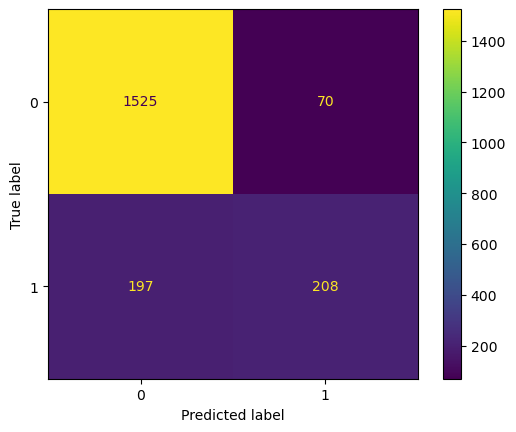

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The Random Classifier Model has an accuracy of 86.35%.


*XGBoost*

In [170]:
#Machine Learing Algorithm Training (XGboost)
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.53      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.857


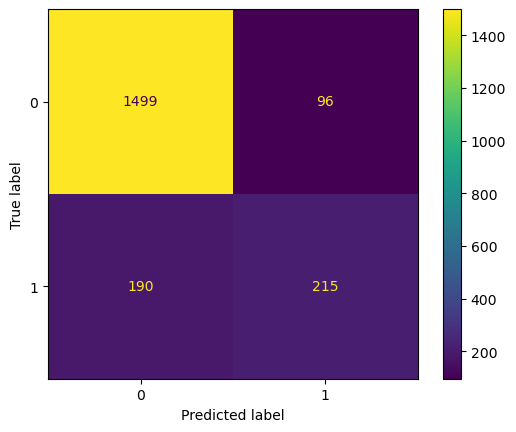

In [172]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

<Axes: >

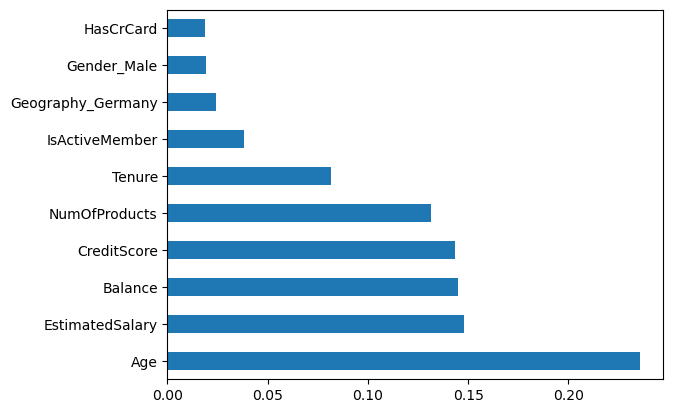

In [173]:
#Feature evaluation
# How much important a faetures is
feat_importances = pd.Series(classifier.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In the bar chart the important columns which affect the target variable the most are Age, EstimatedSalary and Balance

the model can be trained again using the 5 most important variable. And if the newly trained model has a accuracy slighty less or higher than the current accuracy we can consider it to be the final model.